<a href="https://colab.research.google.com/github/Teriekarie/SGA_DSCI_2/blob/main/Module3_Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df_cancer = pd.read_csv('/content/drive/MyDrive/STUTERN 1.3 ASSIGNMENT/INTERMEDIATE/Module_3/cancer_data.csv')

In [81]:
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Dataset Attributes Information**
* D number
* Diagnosis (M = malignant, B = benign) (Target Variable)
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)

In [82]:
# get the dimenions of data
df_cancer.shape

(569, 32)

Data wrangling/cleaning stages

In [83]:
# check that the columns are properly labelled
df_cancer.columns

#the columns are properly labelled and has no whitespaces or missing values inbetween

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE',
       'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE',
       'fractal_dimension_SE', 'radius_max', 'texture_max', 'perimeter_max',
       'area_max', 'smoothness_max', 'compactness_max', 'concavity_max',
       'concave_points_max', 'symmetry_max', 'fractal_dimension_max'],
      dtype='object')

In [84]:
#check the data types of the column
df_cancer.dtypes

id                          int64
diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave_points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
radius_SE                 float64
texture_SE                float64
perimeter_SE              float64
area_SE                   float64
smoothness_SE             float64
compactness_SE            float64
concavity_SE              float64
concave_points_SE         float64
symmetry_SE               float64
fractal_dimension_SE      float64
radius_max                float64
texture_max               float64
perimeter_max             float64
area_max                  float64
smoothness_max            float64
compactness_max           float64
concavity_max             float64
concave_points

In [85]:
#Check for Missing Values in the dataframe
df_cancer.isnull().any().any()

True

In [86]:
df_cancer.isnull().any()

#this shows the specific columns with missing values

id                        False
diagnosis                 False
radius_mean               False
texture_mean               True
perimeter_mean            False
area_mean                 False
smoothness_mean            True
compactness_mean          False
concavity_mean            False
concave_points_mean       False
symmetry_mean              True
fractal_dimension_mean    False
radius_SE                 False
texture_SE                 True
perimeter_SE              False
area_SE                   False
smoothness_SE              True
compactness_SE            False
concavity_SE              False
concave_points_SE         False
symmetry_SE                True
fractal_dimension_SE      False
radius_max                False
texture_max                True
perimeter_max             False
area_max                  False
smoothness_max             True
compactness_max           False
concavity_max             False
concave_points_max        False
symmetry_max               True
fractal_

In [87]:
#Check for the total missing values in each column
df_cancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean              21
perimeter_mean             0
area_mean                  0
smoothness_mean           48
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean             65
fractal_dimension_mean     0
radius_SE                  0
texture_SE                21
perimeter_SE               0
area_SE                    0
smoothness_SE             48
compactness_SE             0
concavity_SE               0
concave_points_SE          0
symmetry_SE               65
fractal_dimension_SE       0
radius_max                 0
texture_max               21
perimeter_max              0
area_max                   0
smoothness_max            48
compactness_max            0
concavity_max              0
concave_points_max         0
symmetry_max              65
fractal_dimension_max      0
dtype: int64

In [88]:
#describing the dataframe
df_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
count,5.690000e+02,569.000000,548.000000,569.000000,569.000000,521.000000,569.000000,569.000000,569.000000,504.000000,...,569.000000,548.000000,569.000000,569.000000,521.000000,569.000000,569.000000,569.000000,504.000000,569.000000
mean,3.051467e+07,14.113021,19.293431,91.877909,653.288576,0.096087,0.104536,0.088620,0.048837,0.181091,...,16.261896,25.660803,107.211142,880.163796,0.132090,0.254557,0.271681,0.114377,0.288856,0.084012
std,1.250417e+08,3.506148,4.327287,24.162787,349.476899,0.013924,0.052674,0.079011,0.038578,0.027899,...,4.841175,6.202916,33.621975,570.498628,0.022685,0.158042,0.208298,0.065760,0.062520,0.018151
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.691040e+05,11.700000,16.167500,75.170000,420.300000,0.086050,0.065260,0.029560,0.020360,0.161800,...,13.010000,21.017500,84.110000,515.300000,0.116600,0.146000,0.112500,0.064020,0.247650,0.071270
50%,9.060240e+05,13.370000,18.785000,86.340000,551.100000,0.095780,0.094530,0.061550,0.033700,0.178950,...,14.970000,25.370000,97.650000,686.500000,0.131200,0.211900,0.226700,0.100100,0.280650,0.080040
75%,8.910251e+06,15.780000,21.825000,103.800000,782.700000,0.104800,0.130500,0.131900,0.074040,0.195750,...,18.760000,29.675000,125.100000,1070.000000,0.145000,0.339900,0.385300,0.162500,0.317525,0.092110
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [89]:
#rather than dropping the missing values, we fill the up with their mean
df_cancer_texture_mean= df_cancer['texture_mean'].fillna(df_cancer['texture_mean'].mean(), inplace=True)

df_cancer_smoothness_mean= df_cancer['smoothness_mean'].fillna(df_cancer['smoothness_mean'].mean(), inplace=True)

df_cancer_texture_mean= df_cancer['symmetry_mean'].fillna(df_cancer['symmetry_mean'].mean(), inplace=True)

df_cancer_texture_SE= df_cancer['texture_SE'].fillna(df_cancer['texture_SE'].mean(), inplace=True)

df_cancer_smoothness_SE= df_cancer['smoothness_SE'].fillna(df_cancer['smoothness_SE'].mean(), inplace=True)

df_cancer_symmetry_SE= df_cancer['symmetry_SE'].fillna(df_cancer['symmetry_SE'].mean(), inplace=True)

df_cancer_texture_max= df_cancer['texture_max'].fillna(df_cancer['texture_max'].mean(), inplace=True)

df_cancer_smoothness_max= df_cancer['smoothness_max'].fillna(df_cancer['smoothness_max'].mean(), inplace=True)

df_cancer_symmetry_max= df_cancer['symmetry_max'].fillna(df_cancer['symmetry_max'].mean(), inplace=True)

In [90]:
df_cancer.isnull().sum()

id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave_points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
radius_SE                 0
texture_SE                0
perimeter_SE              0
area_SE                   0
smoothness_SE             0
compactness_SE            0
concavity_SE              0
concave_points_SE         0
symmetry_SE               0
fractal_dimension_SE      0
radius_max                0
texture_max               0
perimeter_max             0
area_max                  0
smoothness_max            0
compactness_max           0
concavity_max             0
concave_points_max        0
symmetry_max              0
fractal_dimension_max     0
dtype: int64

In [91]:
#Checking for duplicates
df_cancer.duplicated().any()

True

In [92]:
df_cancer[df_cancer.duplicated()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
202,852552,M,16.65,21.38,110.00,904.6,0.11210,0.14570,0.15250,0.09170,...,26.46,31.56,177.00,2215.0,0.18050,0.35780,0.46950,0.20950,0.3613,0.09564
325,89511502,B,12.67,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,...,13.71,21.10,88.70,574.4,0.13840,0.12120,0.10200,0.05602,0.2688,0.06888
345,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.13600,0.16360,0.07162,0.04074,0.2434,0.08488
489,9113846,B,12.27,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,...,13.45,38.05,85.08,558.9,0.09422,0.05213,0.00000,0.00000,0.2409,0.06743
558,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,...,15.48,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004


In [93]:
# dropping the duplicates
df_cancer.drop_duplicates(inplace = True)

In [94]:
# check to see if there are still duplicates
df_cancer.duplicated().sum()

0

In [95]:
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,...,25.38,25.660803,184.60,2019.0,0.16220,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,...,24.99,23.410000,158.80,1956.0,0.12380,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,...,23.57,25.530000,152.50,1709.0,0.14440,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.2414,0.10520,...,14.91,26.500000,98.87,567.7,0.13209,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,...,22.54,16.670000,152.20,1575.0,0.13740,0.2050,0.4000,0.1625,0.2364,0.07678


In [96]:
df_cancer.isna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [97]:
df_cancer.isna().any().sum()  #There are no null values present in the dataset

0

In [98]:
df_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.30010,0.14710,...,25.380,25.660803,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,...,24.990,23.410000,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,...,23.570,25.530000,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.24140,0.10520,...,14.910,26.500000,98.87,567.7,0.13209,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,...,22.540,16.670000,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.390000,142.00,1479.0,0.111000,0.11590,0.24390,0.13890,...,25.450,26.400000,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.250000,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,...,23.690,38.250000,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.080000,108.30,858.1,0.084550,0.10230,0.09251,0.05302,...,18.980,34.120000,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.330000,140.10,1265.0,0.117800,0.27700,0.35140,0.15200,...,25.740,39.420000,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [99]:
# rounding up the numbers to be of the same decimal places
df_cancer.round(6)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.30010,0.14710,...,25.380,25.660803,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,...,24.990,23.410000,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,...,23.570,25.530000,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.24140,0.10520,...,14.910,26.500000,98.87,567.7,0.13209,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,...,22.540,16.670000,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.390000,142.00,1479.0,0.111000,0.11590,0.24390,0.13890,...,25.450,26.400000,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.250000,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,...,23.690,38.250000,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.080000,108.30,858.1,0.084550,0.10230,0.09251,0.05302,...,18.980,34.120000,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.330000,140.10,1265.0,0.117800,0.27700,0.35140,0.15200,...,25.740,39.420000,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Explorations at EDA stage.

In [100]:
import seaborn as sns

In [101]:
#Basic information

df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      564 non-null    int64  
 1   diagnosis               564 non-null    object 
 2   radius_mean             564 non-null    float64
 3   texture_mean            564 non-null    float64
 4   perimeter_mean          564 non-null    float64
 5   area_mean               564 non-null    float64
 6   smoothness_mean         564 non-null    float64
 7   compactness_mean        564 non-null    float64
 8   concavity_mean          564 non-null    float64
 9   concave_points_mean     564 non-null    float64
 10  symmetry_mean           564 non-null    float64
 11  fractal_dimension_mean  564 non-null    float64
 12  radius_SE               564 non-null    float64
 13  texture_SE              564 non-null    float64
 14  perimeter_SE            564 non-null    fl

In [102]:
#Correlation 

df_cancer.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
id,1.000000,0.075607,0.102670,0.074114,0.098309,-0.011705,-0.001029,0.050553,0.044276,-0.024495,...,0.082945,0.066221,0.080605,0.107834,0.009561,-0.004040,0.023186,0.035191,-0.043616,-0.031074
radius_mean,0.075607,1.000000,0.331186,0.997860,0.987259,0.164835,0.503133,0.673538,0.821903,0.143403,...,0.969622,0.301933,0.964873,0.940721,0.111963,0.411011,0.521646,0.741997,0.151770,0.008460
texture_mean,0.102670,0.331186,1.000000,0.337239,0.327695,-0.031267,0.248914,0.310958,0.300357,0.059612,...,0.364372,0.912349,0.371456,0.355187,0.061187,0.291935,0.311284,0.304108,0.092931,0.131731
perimeter_mean,0.074114,0.997860,0.337239,1.000000,0.986278,0.199778,0.554102,0.712921,0.850334,0.177461,...,0.969810,0.308117,0.970342,0.941323,0.141476,0.453603,0.558673,0.769114,0.177428,0.052458
area_mean,0.098309,0.987259,0.327695,0.986278,1.000000,0.168539,0.494469,0.681669,0.821821,0.147273,...,0.963271,0.292213,0.959139,0.959465,0.114239,0.387394,0.506210,0.718935,0.131065,0.004355
smoothness_mean,-0.011705,0.164835,-0.031267,0.199778,0.168539,1.000000,0.619859,0.495531,0.527979,0.475315,...,0.201075,0.033121,0.227862,0.193065,0.798387,0.435654,0.410892,0.475318,0.334616,0.453431
compactness_mean,-0.001029,0.503133,0.248914,0.554102,0.494469,0.619859,1.000000,0.882998,0.830033,0.580099,...,0.534229,0.255524,0.588885,0.507293,0.528872,0.865923,0.815361,0.815065,0.510129,0.688678
concavity_mean,0.050553,0.673538,0.310958,0.712921,0.681669,0.495531,0.882998,1.000000,0.920147,0.487944,...,0.687715,0.305918,0.728617,0.674262,0.423686,0.756092,0.882768,0.860114,0.406146,0.517849
concave_points_mean,0.044276,0.821903,0.300357,0.850334,0.821821,0.527979,0.830033,0.920147,1.000000,0.447900,...,0.831243,0.296886,0.856487,0.809366,0.429544,0.667695,0.749400,0.909376,0.372024,0.370951
symmetry_mean,-0.024495,0.143403,0.059612,0.177461,0.147273,0.475315,0.580099,0.487944,0.447900,1.000000,...,0.181697,0.075385,0.212988,0.174409,0.366352,0.452688,0.413539,0.418305,0.710563,0.413845


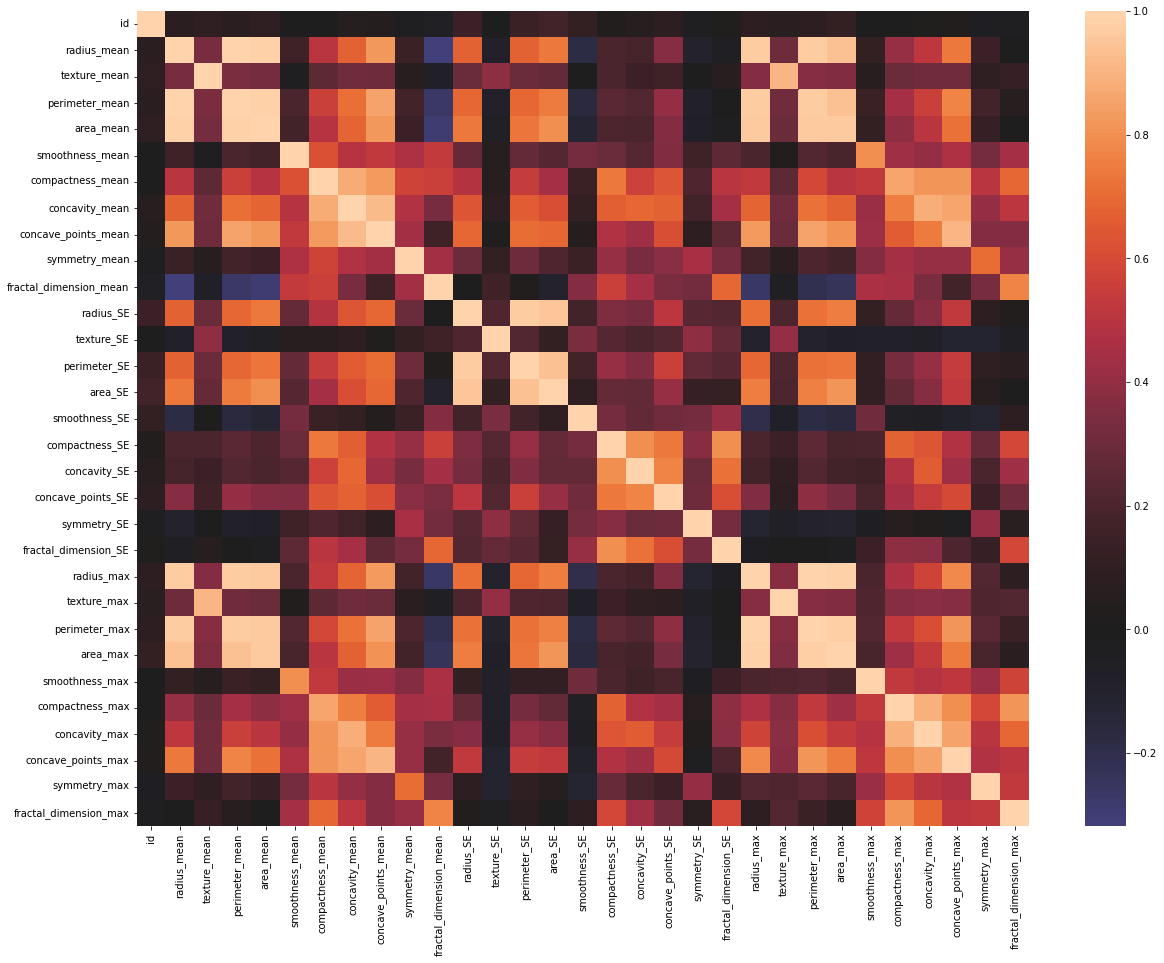

In [103]:
# Plotting the heatmap of correlation of the variables
plt.figure(figsize = (20,15))
sns.heatmap(df_cancer[1:].corr(), center = 0)
plt.show()

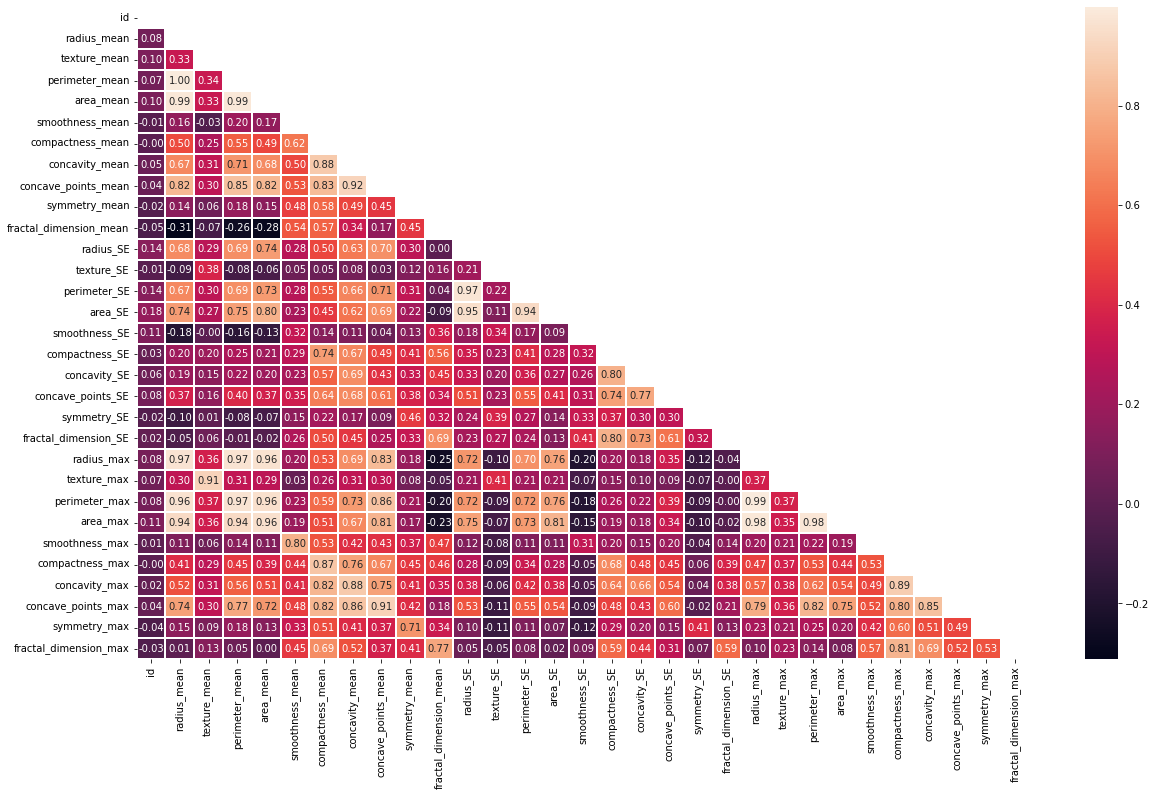

In [104]:
# heatmap 

plt.figure(figsize = (20, 12))

corr = df_cancer.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

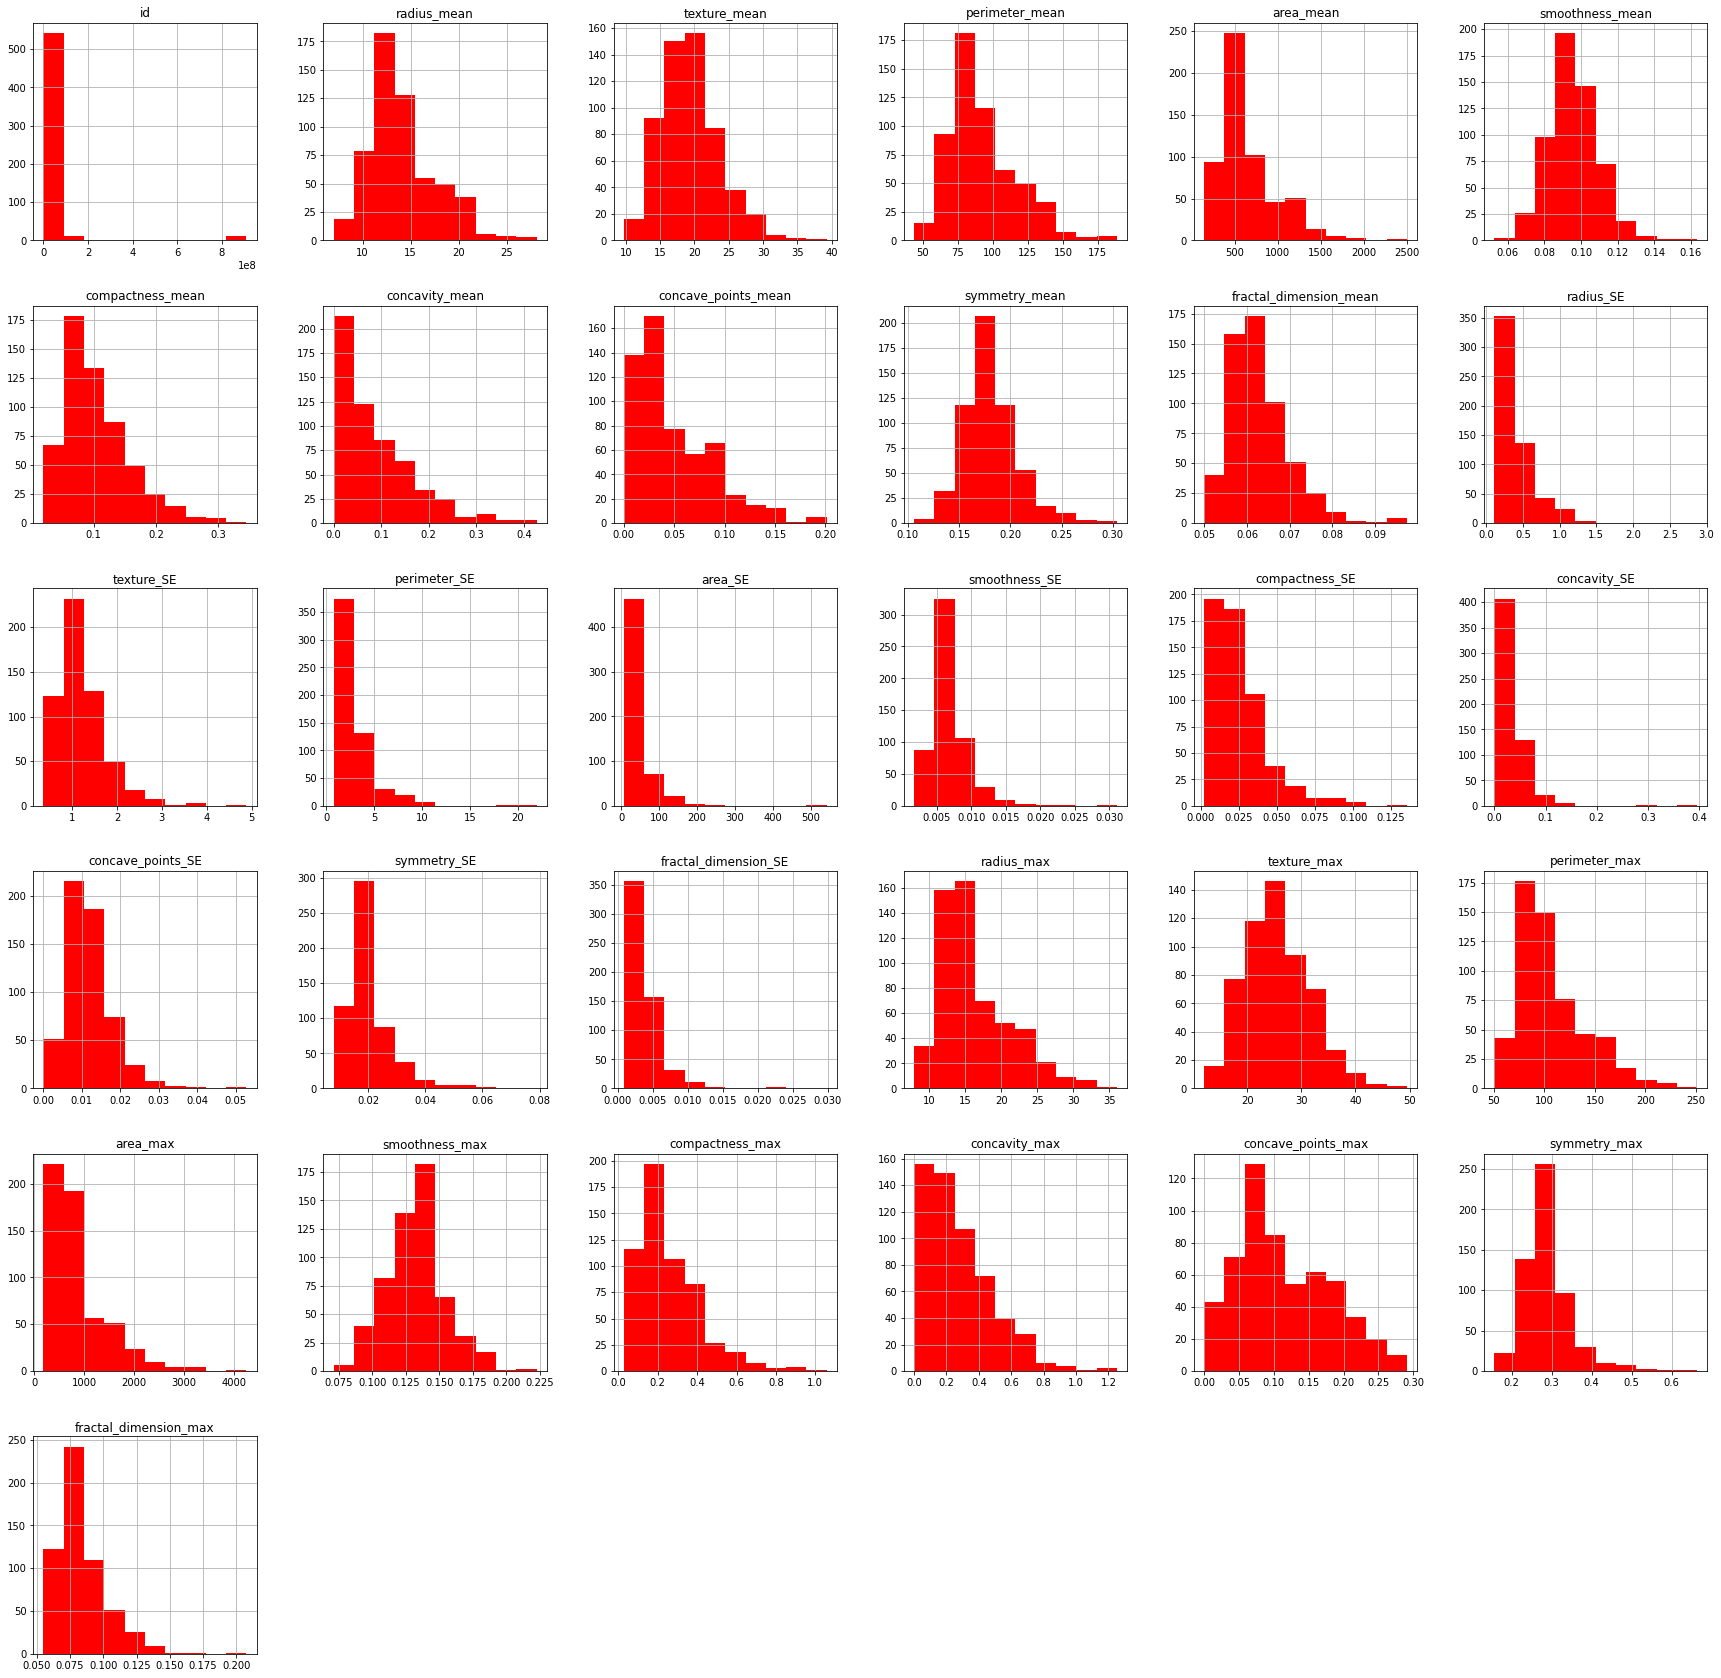

In [105]:
#plot the histograms for each variable:
df_cancer.hist(figsize = (30,30), color = 'red')
plt.show()

In [120]:
all_columns = list(df_cancer.columns)

In [ ]:
melted_data = pd.melt(df_cancer,id_vars = "diagnosis",value_vars = all_columns)
plt.figure(figsize = (35,15))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

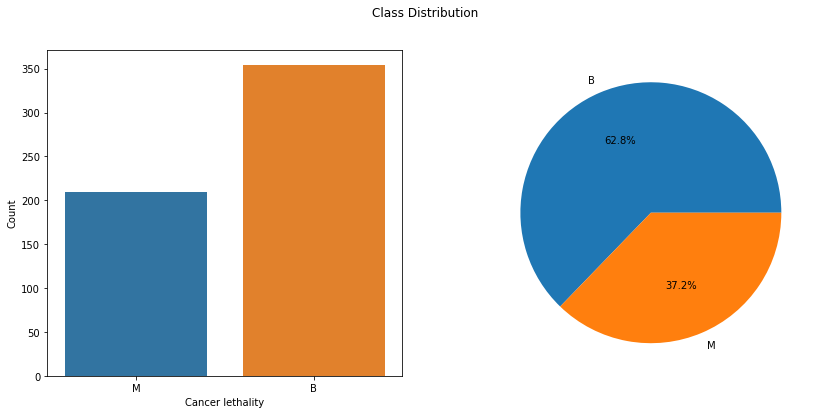

In [108]:
# Analyzing the target variable

# plt.title('Count of cancer type')
# sns.countplot(df_cancer['diagnosis'])
# plt.xlabel('Cancer lethality')
# plt.ylabel('Count')
# plt.show()

fig, axes = plt.subplots(ncols=2, figsize=(14, 6))

sns.countplot(x='diagnosis', data=df_cancer, ax=axes[0])
plt.pie(df_cancer.groupby('diagnosis')['diagnosis'].count(), labels=['B','M'], autopct='%1.1f%%')

fig.suptitle('Class Distribution', fontsize=12)
axes[0].set_xlabel('Cancer lethality')
axes[0].set_ylabel('Count')

axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.show()

This shows that almost 37% of the total data belong to Malignant Class and 63% belong to Benign class.

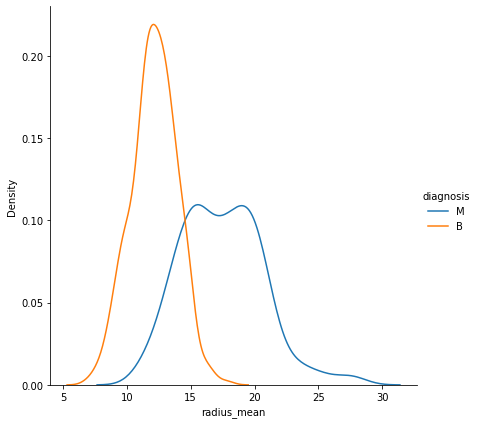

In [110]:
# Distribution density plot KDE (kernel density estimate)
sns.FacetGrid(df_cancer, hue="diagnosis", height=6).map(sns.kdeplot, "radius_mean").add_legend()
plt.show()

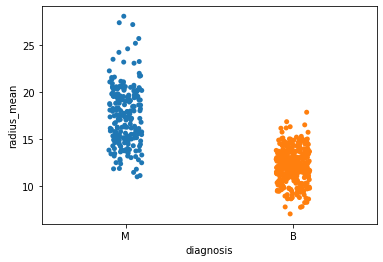

In [111]:
# Plotting the distribution of the mean radius
sns.stripplot(x="diagnosis", y="radius_mean", data=df_cancer, jitter=True, edgecolor="gray")
plt.show()